In [1]:
import tensorflow as tf; tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import os
%matplotlib inline

<class 'numpy.ndarray'>


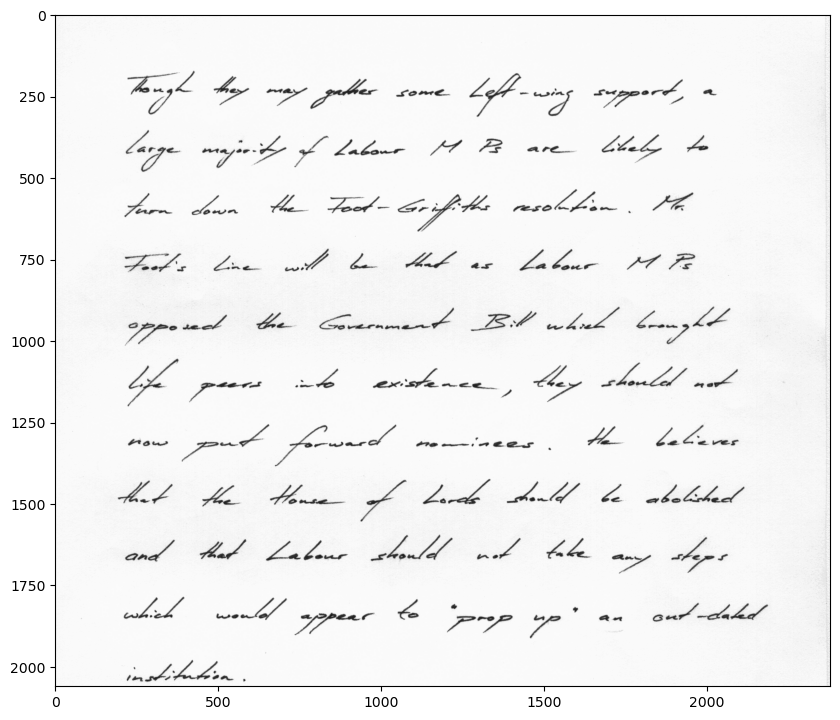

In [5]:
filename = "C:/Users/samdc/OneDrive/Desktop/datasets/specialization/root/data/002/a01-003.png"

# Load in Grayscale
img = cv2.imread(filename)
img = img[720:2780, 100:3000]

# The underlying representation is a numpy array!
print(type(img))

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [7]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray)

In [9]:
#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap='gray', vmax=1, vmin=0)

In [11]:
#dilation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (130, 25))
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
plt.figure(figsize=(10,10))
plt.imshow(img_dilation, cmap='gray', vmax=1, vmin=0)

(2060, 2379, 3)
[[163, 159, 1936, 164], [344, 153, 1917, 151], [526, 150, 1874, 152], [708, 150, 1880, 94], [886, 151, 1987, 142], [1045, 159, 2002, 169], [1246, 161, 2002, 152], [1414, 129, 2052, 153], [1585, 152, 1978, 141], [1775, 148, 2105, 150], [1969, 157, 492, 89]]


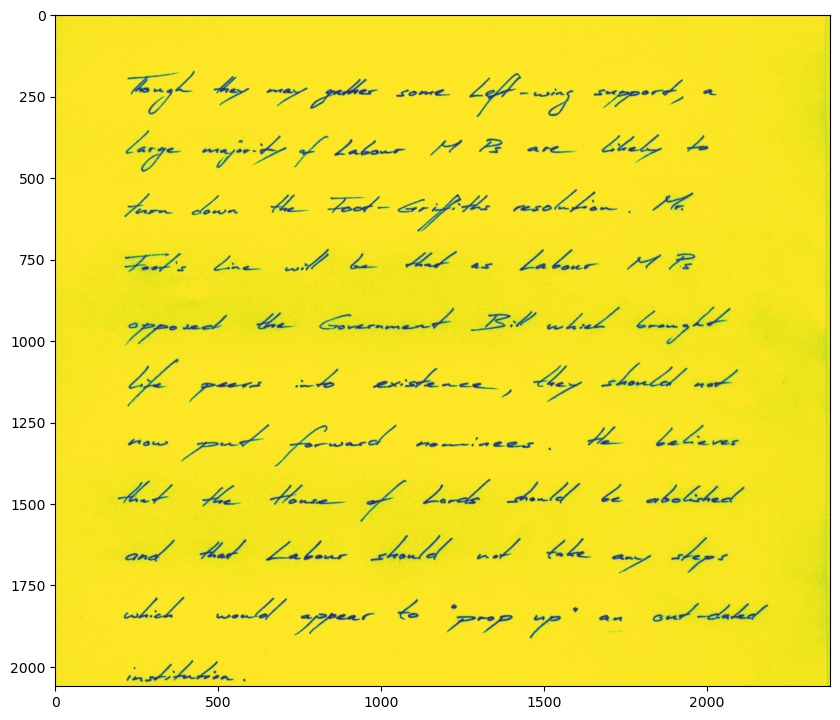

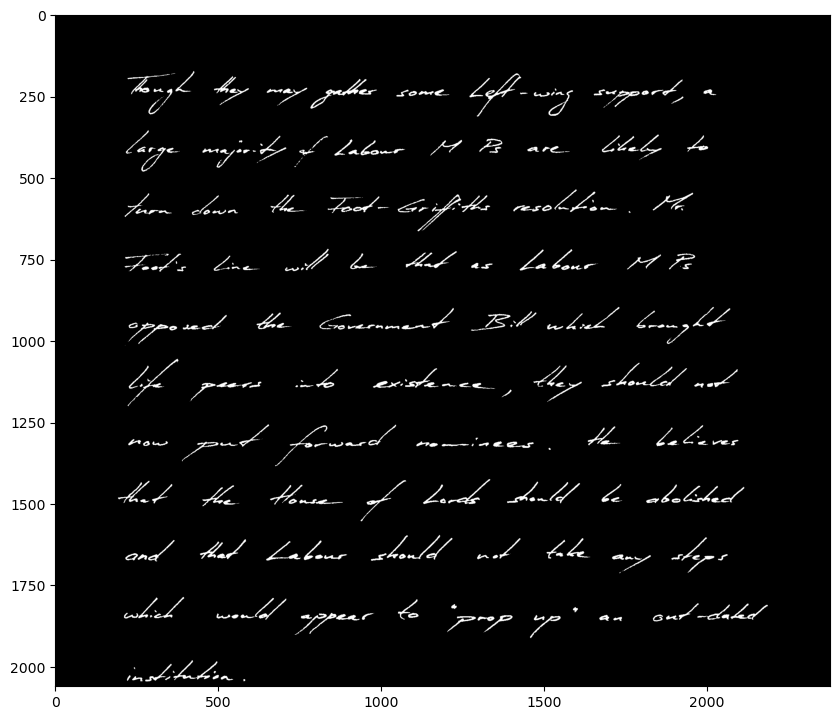

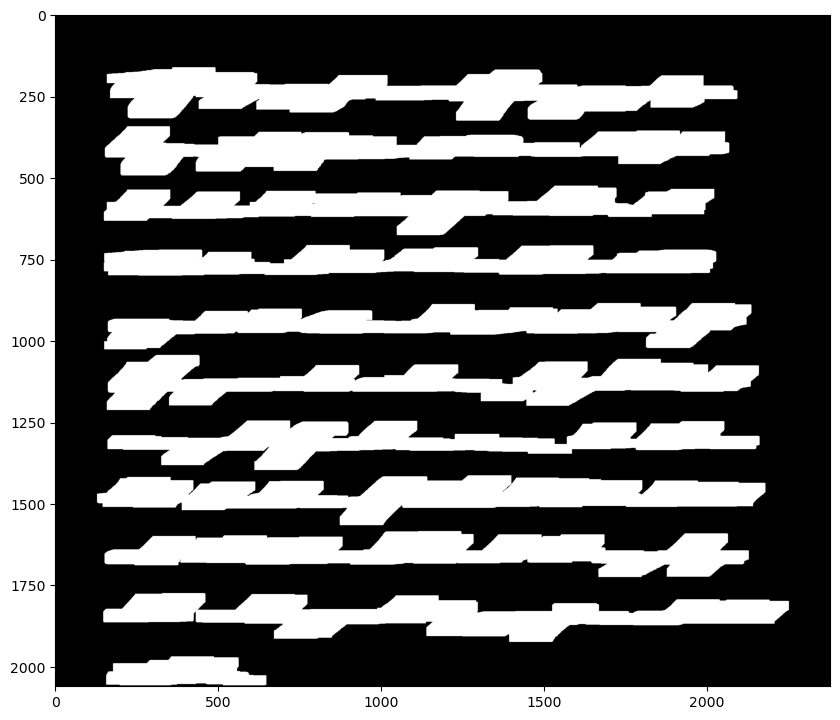

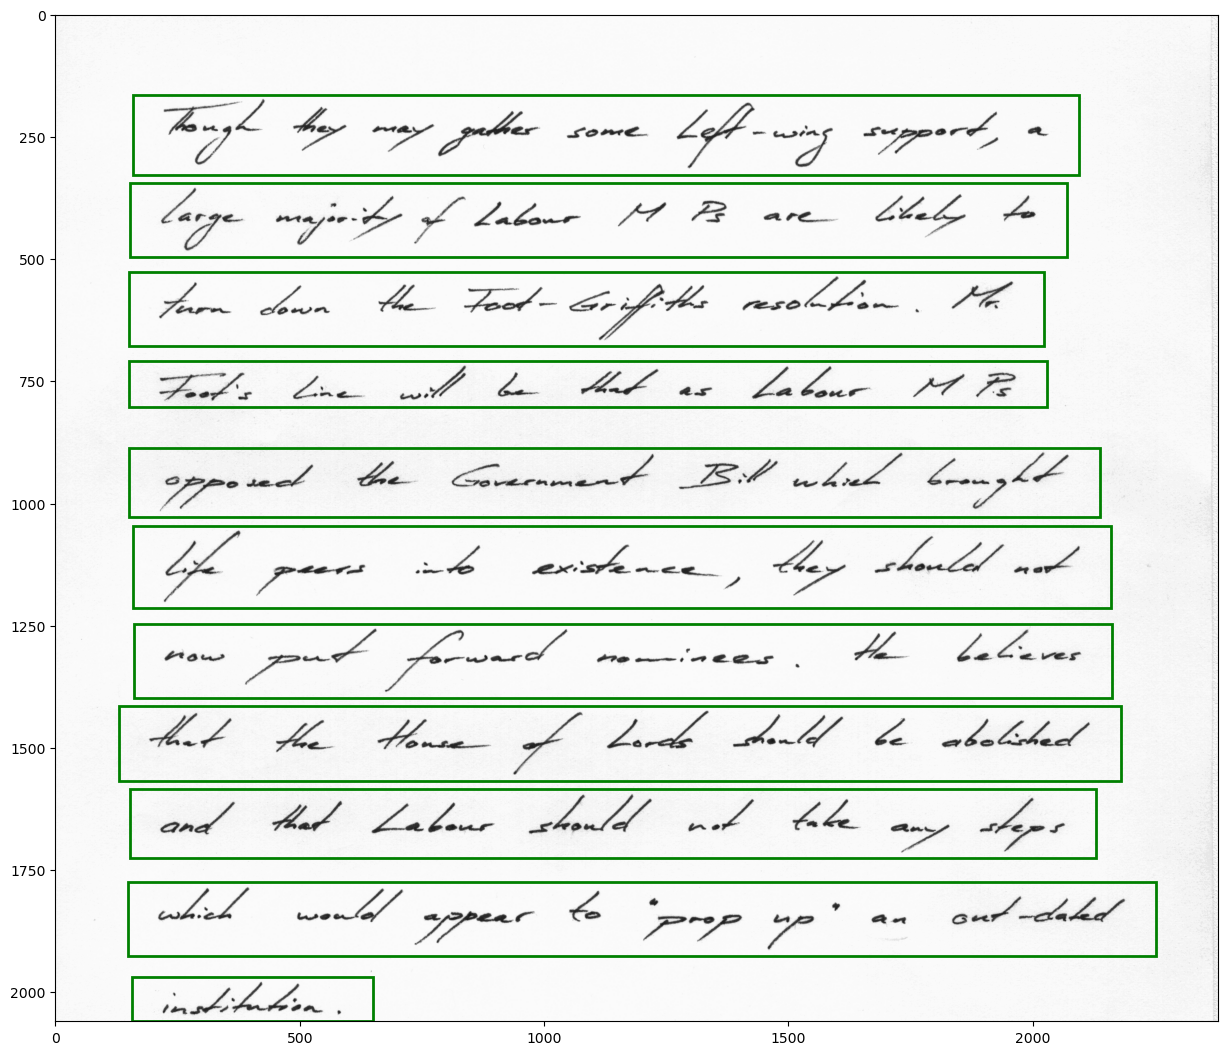

In [13]:
#find contours
ctrs,hier = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0] + cv2.boundingRect(ctr)[1] * img.shape[1] )

plt.figure(figsize=(15,15))
current_axis = plt.gca()

lst = []

for i, ctr in enumerate(sorted_ctrs):
    sub_list = []
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    sub_list.append(y)
    sub_list.append(x)
    sub_list.append(w)
    sub_list.append(h)
    
    #Getting ROI
    #roi = img[y:y+h, x:x+w]
    
    lst.append(sub_list)
    
    # show ROI
    #plt.imshow(roi)
    current_axis.add_patch(Rectangle((x, y), w, h, edgecolor = 'g', fill=False, linewidth=2)) 
    #crop_img = roi
    #cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
    #cv2.waitKey(0)


print(img.shape)
print(lst)
plt.imshow(img)
#cv2.waitKey(0)
plt.show()

In [15]:
#dilation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 25))
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
plt.figure(figsize=(10,10))
plt.imshow(img_dilation, cmap='gray', vmax=1, vmin=0)

(2060, 2379, 3)
[[ 163  214  224  157]
 [ 170 1263  337  157]
 [ 178  479  126  113]
 [ 187  775  223  115]
 [ 188 1645  294  111]
 [ 214  641  143   79]
 [ 219 1039  181   46]
 [ 219 1982   58   42]
 [ 344  208  185  151]
 [ 357 1670  202  103]
 [ 360 1932   83   75]
 [ 361  444  276  122]
 [ 362  726  122  119]
 [ 370 1294   89   68]
 [ 372  849  236   74]
 [ 374 1143  117   72]
 [ 393 1441  149   45]
 [ 526 1398  337   93]
 [ 536 1826  143   78]
 [ 538  205  163   96]
 [ 541 1043  303  137]
 [ 542  653  128   79]
 [ 544  411  161   84]
 [ 547  828  208   75]
 [ 592 1752   25   30]
 [ 708  697  153   92]
 [ 709 1417  260   90]
 [ 715 1068  176   76]
 [ 722  205  207   80]
 [ 722  897  100   72]
 [ 722 1876   99   73]
 [ 725 1747  123   70]
 [ 729  478  160   70]
 [ 751 1269   84   42]
 [ 886 1501  242   94]
 [ 886 1775  308  138]
 [ 889  803  431   91]
 [ 899 1268  220   84]
 [ 903  610  126   75]
 [ 910  206  331  118]
 [1045  214  175  169]
 [1057 1668  282   98]
 [1065 1460  167  

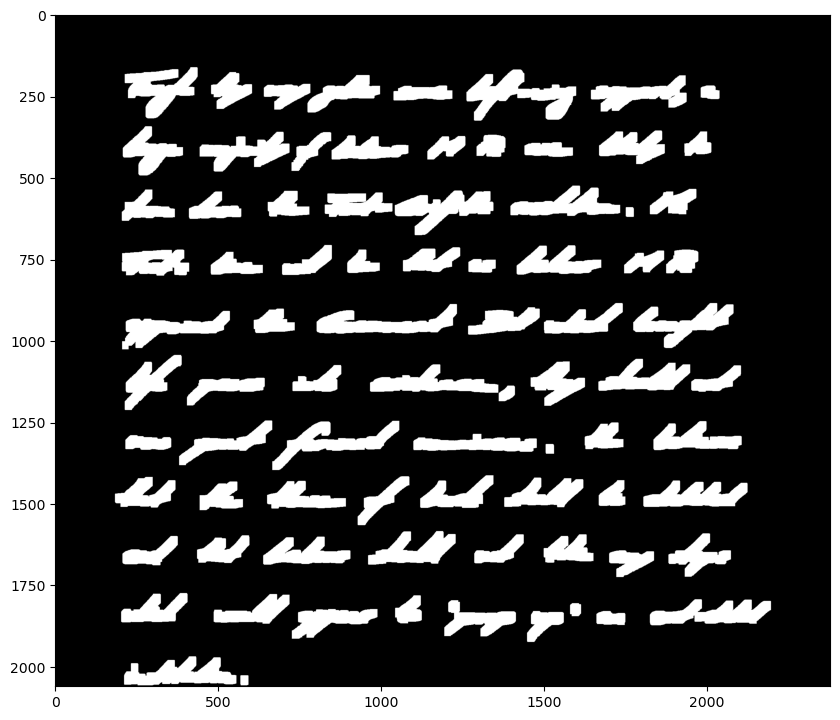

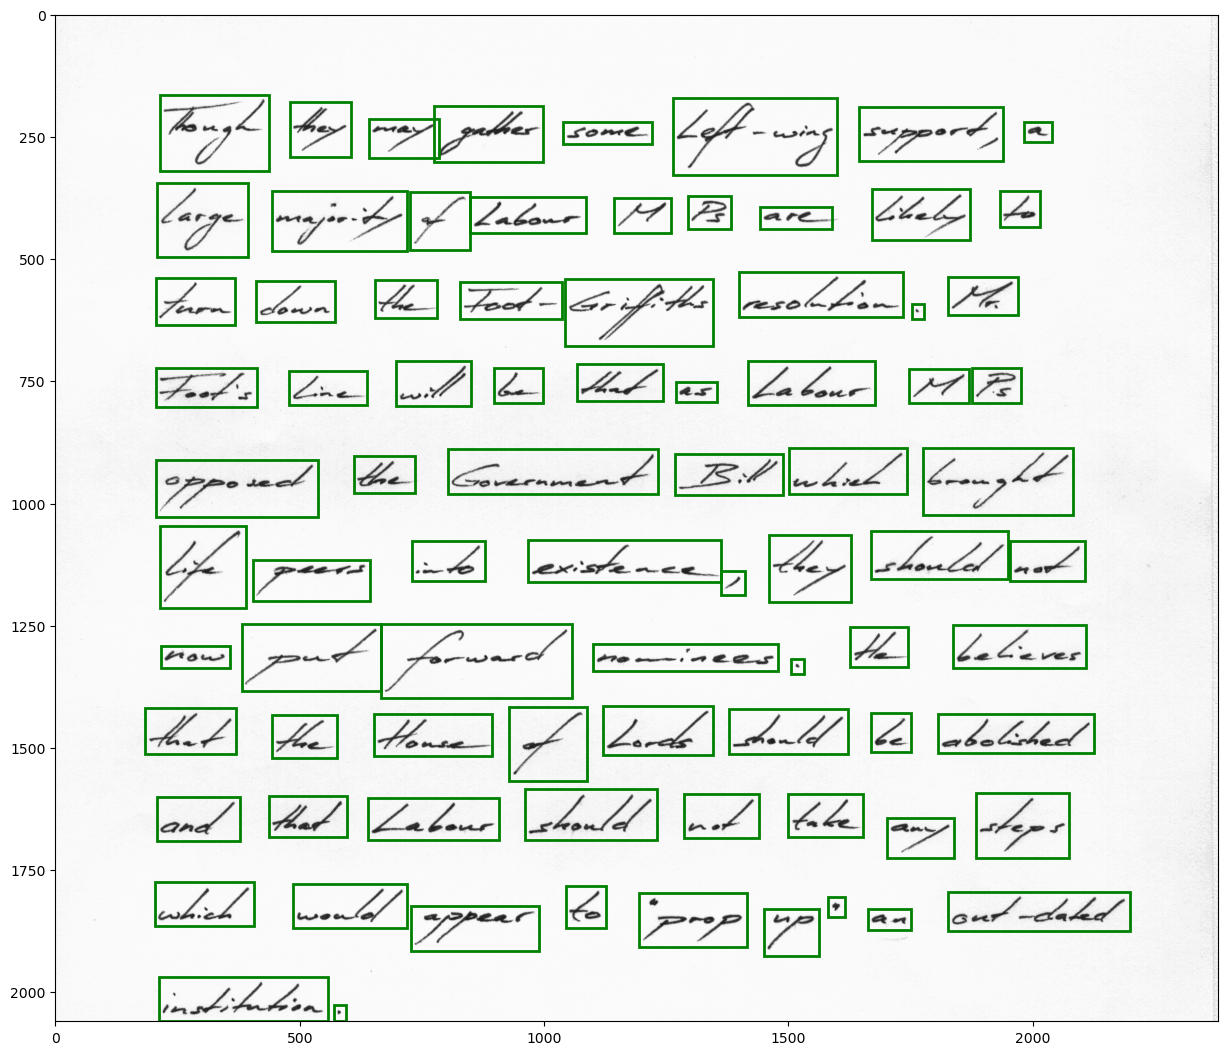

81


In [17]:
#find contours
ctrs,hier = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#sort contours from left to right and top to bottom
#sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
#it only sorts by y position of the bbox. to sort by x and y you'd use:
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0] + cv2.boundingRect(ctr)[1] * img.shape[1] )

plt.figure(figsize=(15,15))
current_axis = plt.gca()

lst4 = []

for k, ctr in enumerate(sorted_ctrs):
    sub_list1 = []
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    sub_list1.append(y)
    sub_list1.append(x)
    sub_list1.append(w)
    sub_list1.append(h)
    
    #Getting ROI
    #roi = img[y:y+h, x:x+w]
    
    lst4.append(sub_list1)
    # show ROI
    #plt.imshow(roi)
    current_axis.add_patch(Rectangle((x, y), w, h, edgecolor = 'g', fill=False, linewidth=2)) 
    #crop_img = roi
    #cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
    #cv2.waitKey(0)

fin_boxes = np.array(lst4)
print(img.shape)
print(fin_boxes)
plt.imshow(img)
#cv2.waitKey(0)
plt.show()
print(k)

In [19]:
type(lst4)

list

In [21]:
lst.sort()

#os.mkdir(filename[:-4])
plt.savefig("C:/Users/samdc/OneDrive/Desktop/datasets/specialization/root/working/filename[:-4]")
for i in range(len(lst)):
      cv2.imwrite(filename[:-4] + '/' + filename[:-4] + '-'+ str(i) + '.jpg', 
                  img[lst[i][0]: lst[i][0] + lst[i][3], lst[i][1]: lst[i][1] + lst[i][2]])

In [23]:
from collections import defaultdict
from dataclasses import dataclass
from typing import List

import cv2
import numpy as np
from sklearn.cluster import DBSCAN

In [25]:
@dataclass
class BBox:
    x: int
    y: int
    w: int
    h: int


@dataclass
class DetectorRes:
    img: np.ndarray
    bbox: BBox


def detect(img: np.ndarray,
           kernel_size: int,
           sigma: float,
           theta: float,
           min_area: int) -> List[DetectorRes]:
    assert img.ndim == 2
    assert img.dtype == np.uint8

    # apply filter kernel
    kernel = _compute_kernel(kernel_size, sigma, theta)
    img_filtered = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_REPLICATE).astype(np.uint8)
    img_thres = 255 - cv2.threshold(img_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # append components to result
    res = []
    components = cv2.findContours(img_thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    for c in components:
        # skip small word candidates
        if cv2.contourArea(c) < min_area:
            continue
        # append bounding box and image of word to result list
        x, y, w, h = cv2.boundingRect(c)  # bounding box as tuple (x, y, w, h)
        crop = img[y:y + h, x:x + w]
        res.append(DetectorRes(crop, BBox(x, y, w, h)))

    return res


def _compute_kernel(kernel_size: int,
                    sigma: float,
                    theta: float) -> np.ndarray:
    """Compute anisotropic filter kernel."""

    assert kernel_size % 2  # must be odd size

    # create coordinate grid
    half_size = kernel_size // 2
    xs = ys = np.linspace(-half_size, half_size, kernel_size)
    x, y = np.meshgrid(xs, ys)

    # compute sigma values in x and y direction, where theta is roughly the average x/y ratio of words
    sigma_y = sigma
    sigma_x = sigma_y * theta

    # compute terms and combine them
    exp_term = np.exp(-x ** 2 / (2 * sigma_x) - y ** 2 / (2 * sigma_y))
    x_term = (x ** 2 - sigma_x ** 2) / (2 * np.math.pi * sigma_x ** 5 * sigma_y)
    y_term = (y ** 2 - sigma_y ** 2) / (2 * np.math.pi * sigma_y ** 5 * sigma_x)
    kernel = (x_term + y_term) * exp_term

    # normalize and return kernel
    kernel = kernel / np.sum(kernel)
    return kernel


def prepare_img(img: np.ndarray,
                height: int) -> np.ndarray:
    """Convert image to grayscale image (if needed) and resize to given height."""
    assert img.ndim in (2, 3)
    assert height > 0
    assert img.dtype == np.uint8
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h = img.shape[0]
    factor = height / h
    return cv2.resize(img, dsize=None, fx=factor, fy=factor)


def _cluster_lines(detections: List[DetectorRes],
                   max_dist: float = 0.7,
                   min_words_per_line: int = 2) -> List[List[DetectorRes]]:
    # compute matrix containing Jaccard distances (which is a proper metric)
    num_bboxes = len(detections)
    dist_mat = np.ones((num_bboxes, num_bboxes))
    for i in range(num_bboxes):
        for j in range(i, num_bboxes):
            a = detections[i].bbox
            b = detections[j].bbox
            if a.y > b.y + b.h or b.y > a.y + a.h:
                continue
            intersection = min(a.y + a.h, b.y + b.h) - max(a.y, b.y)
            union = a.h + b.h - intersection
            iou = np.clip(intersection / union if union > 0 else 0, 0, 1)
            dist_mat[i, j] = dist_mat[j, i] = 1 - iou  # Jaccard distance is defined as 1-iou

    dbscan = DBSCAN(eps=max_dist, min_samples=min_words_per_line, metric='precomputed').fit(dist_mat)

    clustered = defaultdict(list)
    for i, cluster_id in enumerate(dbscan.labels_):
        if cluster_id == -1:
            continue
        clustered[cluster_id].append(detections[i])

    res = sorted(clustered.values(), key=lambda line: [det.bbox.y + det.bbox.h / 2 for det in line])
    return res


def sort_multiline(detections: List[DetectorRes],
                   max_dist: float = 0.7,
                   min_words_per_line: int = 2) -> List[List[DetectorRes]]:
    lines = _cluster_lines(detections, max_dist, min_words_per_line)
    res = []
    for line in lines:
        res += sort_line(line)
    return res


def sort_line(detections: List[DetectorRes]) -> List[List[DetectorRes]]:
    """Sort the list of detections according to x-coordinates of word centers."""
    return [sorted(detections, key=lambda det: det.bbox.x + det.bbox.w / 2)]

In [27]:
img1=cv2.imread(r"C:/Users/samdc/OneDrive/Desktop/datasets/specialization/root/self_lines/selfMade_102.png")
plt.figure(figsize=(10,10))
plt.imshow(img1)

[BBox(x=23, y=27, w=87, h=15), BBox(x=143, y=20, w=32, h=15), BBox(x=201, y=17, w=68, h=18), BBox(x=286, y=19, w=68, h=14), BBox(x=382, y=11, w=62, h=19), BBox(x=468, y=7, w=58, h=17), BBox(x=554, y=13, w=97, h=15), BBox(x=663, y=12, w=92, h=34)]


C:\Users\samdc\AppData\Local\Temp\ipykernel_10272\1030833816.py:61: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  x_term = (x ** 2 - sigma_x ** 2) / (2 * np.math.pi * sigma_x ** 5 * sigma_y)
C:\Users\samdc\AppData\Local\Temp\ipykernel_10272\1030833816.py:62: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  y_term = (y ** 2 - sigma_y ** 2) / (2 * np.math.pi * sigma_y ** 5 * sigma_x)


<Figure size 640x480 with 0 Axes>

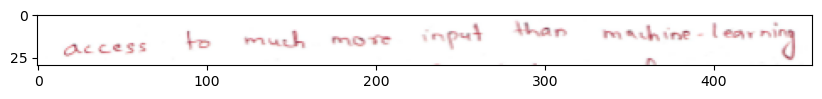

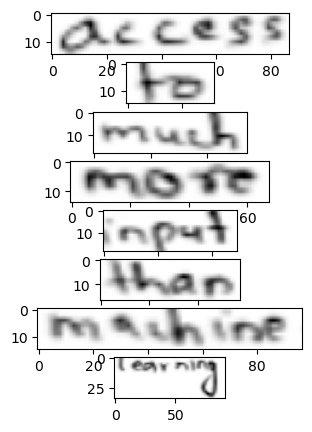

In [29]:
# (1) prepare image:
# (1a) convert to grayscale
# (1b) scale to specified height because algorithm is not scale-invariant
lst3 = []
img = prepare_img(img1,50)
plt.figure(figsize=(5,5))
# (2) detect words in image
detections = detect(img,kernel_size=25,sigma=11,theta=7,min_area=100)

# (3) sort words in line
line = sort_line(detections)[0]

# (4) show word images
plt.subplot(len(line), 1, 1)
plt.imshow(img, cmap='gray')
for i, word in enumerate(line):
    lst3.append(word.bbox)
    #print(word.bbox)
    plt.subplot(len(line), 1, i + 1)
    plt.imshow(word.img, cmap='gray')
print(lst3)
plt.show()

In [51]:
import numpy as np
import cv2
import os
import pandas as pd
import string
import matplotlib.pyplot as plt

from keras.utils import pad_sequences

from keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional
from keras.models import Model
from keras.activations import relu, sigmoid, softmax
import keras.backend as K

from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from PIL import Image

import tensorflow as tf

#ignore warnings in the output
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [53]:
 images = []
labels = []

RECORDS_COUNT = 30000

In [55]:
train_images = []
train_labels = []
train_input_length = []
train_label_length = []
train_original_text = []

valid_images = []
valid_labels = []
valid_input_length = []
valid_label_length = []
valid_original_text = []

inputs_length = []
labels_length = []

In [57]:
with open(r"C:/Users/samdc/OneDrive/Desktop/datasets/specialization/root/words_new.txt") as f:
    contents = f.readlines()[18:22539]

lines = [line.strip() for line in contents] 
lines[1]

'a01-000u-00-01 ok 154 507 766 213 48 NN MOVE'

In [59]:
def process_image(img):
    w, h = img.shape

    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape
    
    img = img.astype('float32')
    
    # Converts each to (32, 128, 1)
    if w < 32:
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape
    
    if h < 128:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape
        
    if h > 128 or w > 32:
        dim = (128,32)
        img = cv2.resize(img, dim)
    
    img = cv2.subtract(255, img)
    
    img = np.expand_dims(img, axis=2)
    
    # Normalize 
    img = img / 255
    
    return img

In [61]:
max_label_len = 0

char_list = "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz" 

# string.ascii_letters + string.digits (Chars & Digits)
# or 
# "!\"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

print(char_list, len(char_list))

def encode_to_labels(txt):
    # encoding each output word into digits
    dig_lst = []
    for index, chara in enumerate(txt):
        dig_lst.append(char_list.index(chara))
        
    return dig_lst

!"#&'()*+,-./0123456789:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz 78


In [69]:
for index, line in enumerate(lines):
    splits = line.split(' ')
    status = splits[1]
    
    if status == 'ok':
        word_id = splits[0]
        word = "".join(splits[8:])
        
        splits_id = word_id.split('-')
        filepath = r"C:/Users/samdc/OneDrive/Desktop/datasets/specialization/root/iam_words/words/{}/{}-{}/{}.png".format(splits_id[0], 
                                                  splits_id[0], 
                                                  splits_id[1], 
                                                  word_id)
      
        # process image
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        try:
            img = process_image(img)
        except:
            continue
            
        # process label
        try:
            label = encode_to_labels(word)
        except:
            continue
        
        if index % 10 == 0:
            valid_images.append(img)
            valid_labels.append(label)
            valid_input_length.append(31)
            valid_label_length.append(len(word))
            valid_original_text.append(word)
        else:
            train_images.append(img)
            train_labels.append(label)
            train_input_length.append(31)
            train_label_length.append(len(word))
            train_original_text.append(word)
        
        if len(word) > max_label_len:
            max_label_len = len(word)
    
    if index >= RECORDS_COUNT:
        break

In [70]:
train_padded_label = pad_sequences(train_labels, 
                             maxlen=max_label_len, 
                             padding='post',
                             value=len(char_list))

valid_padded_label = pad_sequences(valid_labels, 
                             maxlen=max_label_len, 
                             padding='post',
                             value=len(char_list))

In [71]:
train_labels[3101]

[70, 67, 56, 65, 55, 60, 65, 58]

In [75]:
train_padded_label[3101]

array([70, 67, 56, 65, 55, 60, 65, 58, 78, 78, 78, 78, 78, 78, 78, 78, 78])

In [77]:
train_padded_label.shape, valid_padded_label.shape

((18074, 17), (2007, 17))

In [79]:
train_images = np.asarray(train_images).reshape(-1, 32, 128, 1)
train_input_length = np.asarray(train_input_length)
train_label_length = np.asarray(train_label_length)

valid_images = np.asarray(valid_images).reshape(-1, 32, 128, 1)
valid_input_length = np.asarray(valid_input_length)
valid_label_length = np.asarray(valid_label_length)

In [81]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import backend as tf_keras_backend
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

tf_keras_backend.set_image_data_format('channels_last')
tf_keras_backend.image_data_format()

'channels_last'

In [83]:
def Model1():
    # input with shape of height=32 and width=128 
    inputs = Input(shape=(32,128,1))

    # convolution layer with kernel size (3,3)
    conv_1 = Conv2D(64, (3,3), activation = 'relu', padding='same')(inputs)
    # poolig layer with kernel size (2,2)
    pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)

    conv_2 = Conv2D(128, (3,3), activation = 'relu', padding='same')(pool_1)
    pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)

    conv_3 = Conv2D(256, (3,3), activation = 'relu', padding='same')(pool_2)

    conv_4 = Conv2D(256, (3,3), activation = 'relu', padding='same')(conv_3)
    # poolig layer with kernel size (2,1)
    pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)

    conv_5 = Conv2D(512, (3,3), activation = 'relu', padding='same')(pool_4)
    # Batch normalization layer
    batch_norm_5 = BatchNormalization()(conv_5)

    conv_6 = Conv2D(512, (3,3), activation = 'relu', padding='same')(batch_norm_5)
    batch_norm_6 = BatchNormalization()(conv_6)
    pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)

    conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)

    squeezed = Lambda(lambda x: K.squeeze(x, 1))(conv_7)

    # bidirectional LSTM layers with units=128
    blstm_1 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(squeezed)
    blstm_2 = Bidirectional(LSTM(256, return_sequences=True, dropout = 0.2))(blstm_1)

    outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

    # model to be used at test time
    act_model = Model(inputs, outputs)
    
    return act_model,outputs,inputs

In [85]:
act_model,outputs,inputs=Model1()

In [87]:
act_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 128, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 32, 128, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 32, 128)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 32, 256)        295168

In [89]:
the_labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, the_labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, the_labels, input_length, label_length], outputs=loss_out)

In [99]:
batch_size = 5
epochs = 15
e = str(epochs)
optimizer_name = 'sgd'

In [101]:
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = optimizer_name, metrics=['accuracy'])

filepath="{}o-{}r-{}e-{}t-{}v.hdf5".format(optimizer_name,
                                          str(RECORDS_COUNT),
                                          str(epochs),
                                          str(train_images.shape[0]),
                                          str(valid_images.shape[0]))

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [103]:
history = model.fit(x=[train_images, train_padded_label, train_input_length, train_label_length],
                    y=np.zeros(len(train_images)),
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_data=([valid_images, valid_padded_label, valid_input_length, valid_label_length], [np.zeros(len(valid_images))]),
                    verbose=1,
                    callbacks=callbacks_list)

Epoch 1/15
3615/3615 [==============================] - ETA: 0s - loss: 0.7932 - accuracy: 0.7093
Epoch 1: val_accuracy improved from -inf to 0.56602, saving model to sgdo-30000r-15e-18074t-2007v.hdf5
3615/3615 [==============================] - 130s 34ms/step - loss: 0.7932 - accuracy: 0.7093 - val_loss: 2.5340 - val_accuracy: 0.5660
Epoch 2/15
3614/3615 [============================>.] - ETA: 0s - loss: 0.5970 - accuracy: 0.7657
Epoch 2: val_accuracy improved from 0.56602 to 0.58296, saving model to sgdo-30000r-15e-18074t-2007v.hdf5
3615/3615 [==============================] - 121s 34ms/step - loss: 0.5969 - accuracy: 0.7657 - val_loss: 2.5317 - val_accuracy: 0.5830
Epoch 3/15
3614/3615 [============================>.] - ETA: 0s - loss: 0.4912 - accuracy: 0.7954
Epoch 3: val_accuracy improved from 0.58296 to 0.60289, saving model to sgdo-30000r-15e-18074t-2007v.hdf5
3615/3615 [==============================] - 121s 33ms/step - loss: 0.4912 - accuracy: 0.7955 - val_loss: 2.6076 - val_

In [107]:
model.save(filepath=r"C:/Users/samdc/OneDrive/Desktop/datasets/specialization/root/models/model2.h5", overwrite=False, include_optimizer=True)

In [131]:
act_model.save(r"C:/Users/samdc/OneDrive/Desktop/datasets/specialization/root/models/ocr_model.keras")

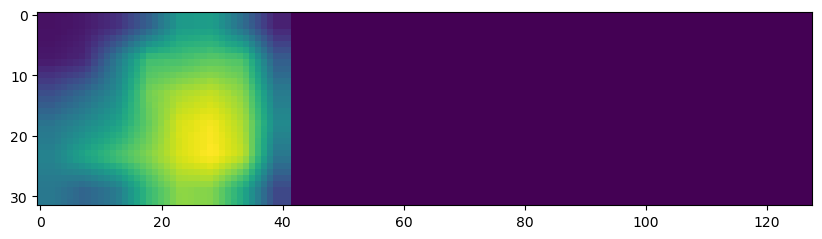

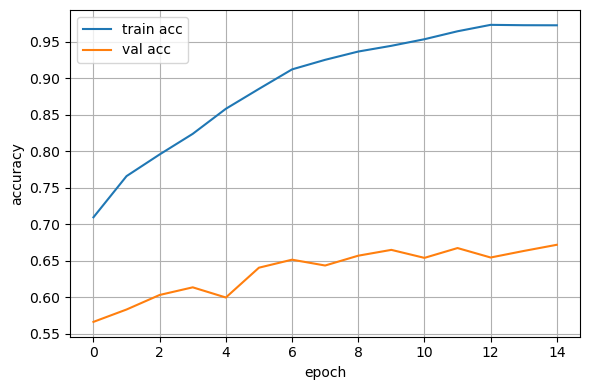

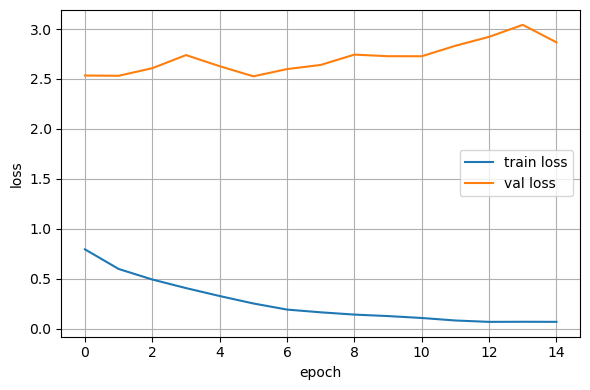

In [135]:
import matplotlib.pyplot as plt

# assume you already ran:
# history = model.fit(..., validation_data=(...), ...)

# Plot accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history.get("accuracy", []), label="train acc")
plt.plot(history.history.get("val_accuracy", []), label="val acc")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# Plot loss
plt.figure(figsize=(6,4))
plt.plot(history.history.get("loss", []), label="train loss")
plt.plot(history.history.get("val_loss", []), label="val loss")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


In [137]:
# Assume you already trained:
# history = model.fit(...)

hist = history.history  # dict: key -> list of epoch values

# Print headers
print("epoch, loss, val_loss, accuracy, val_accuracy")

# Determine number of epochs recorded
n_epochs = max(len(hist.get("loss", [])),
               len(hist.get("val_loss", [])),
               len(hist.get("accuracy", [])),
               len(hist.get("val_accuracy", [])))

# Row-wise numeric printout
for i in range(n_epochs):
    loss = hist.get("loss", [None]*n_epochs)[i]
    val_loss = hist.get("val_loss", [None]*n_epochs)[i]
    acc = hist.get("accuracy", [None]*n_epochs)[i]           # weighted if sample_weight was used
    val_acc = hist.get("val_accuracy", [None]*n_epochs)[i]
    print(f"{i+1}, {loss}, {val_loss}, {acc}, {val_acc}")

# Also print final and best metrics
if "loss" in hist:
    print("\nFinal loss:", hist["loss"][-1])
if "val_loss" in hist:
    print("Final val_loss:", hist["val_loss"][-1], " Best val_loss:", min(hist["val_loss"]))

if "accuracy" in hist:
    print("Final accuracy:", hist["accuracy"][-1], 
          " Best accuracy:", max(hist["accuracy"]))
if "val_accuracy" in hist:
    print("Final val_accuracy:", hist["val_accuracy"][-1], 
          " Best val_accuracy:", max(hist["val_accuracy"]))


epoch, loss, val_loss, accuracy, val_accuracy
1, 0.7932235598564148, 2.534040927886963, 0.7093061804771423, 0.5660189390182495
2, 0.5968719720840454, 2.5316505432128906, 0.7657408714294434, 0.5829596519470215
3, 0.4911600351333618, 2.607609272003174, 0.7954520583152771, 0.602889895439148
4, 0.40532150864601135, 2.7387406826019287, 0.8236693739891052, 0.6133532524108887
5, 0.3258231282234192, 2.627246618270874, 0.8579728007316589, 0.5994020700454712
6, 0.2513873279094696, 2.526176691055298, 0.8852495551109314, 0.6402590870857239
7, 0.19014155864715576, 2.598466634750366, 0.9119729995727539, 0.6512207388877869
8, 0.16274219751358032, 2.6401548385620117, 0.9250857830047607, 0.6432486176490784
9, 0.1400049477815628, 2.7435827255249023, 0.9364280104637146, 0.6567015647888184
10, 0.1251370906829834, 2.7274911403656006, 0.9442846179008484, 0.6646736264228821
11, 0.10603950172662735, 2.7272348403930664, 0.9533030986785889, 0.6537120342254639
12, 0.0809205025434494, 2.832155227661133, 0.9642027

In [115]:
# load CRNN Model
filepath=r"C:/Users/samdc/OneDrive/Desktop/datasets/specialization/root/models/model2.h5"
act_model.load_weights(filepath)

# predict outputs on validation images
prediction = act_model.predict(valid_images)
 
# use CTC decoder
decoded = K.ctc_decode(prediction, 
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]
out = K.get_value(decoded)

import Levenshtein as lv

total_jaro = 0

# see the results
for i, x in enumerate(out):
    letters=''
    for p in x:
        if int(p) != -1:
            letters+=char_list[int(p)]
    total_jaro+=lv.jaro(letters, valid_original_text[i])
  
print('jaro :', total_jaro/len(out))

63/63 [==============================] - 2s 24ms/step
jaro : 0.9396446109575174


1/1 [==============================] - 0s 125ms/step
original_text =   the
predicted text = the

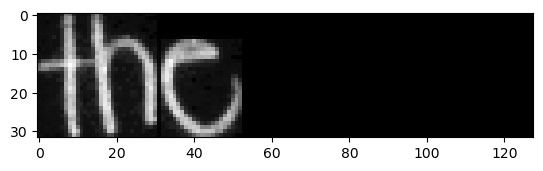



original_text =   a
predicted text = a

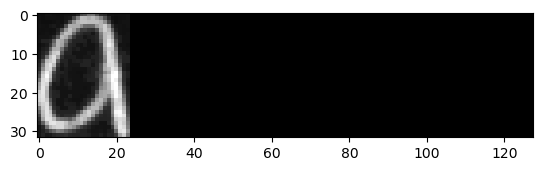



original_text =   on
predicted text = on

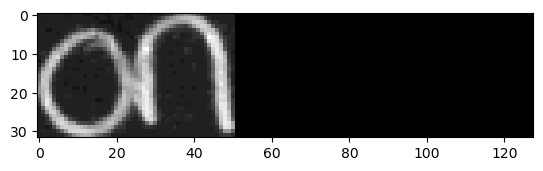



original_text =   members
predicted text = members

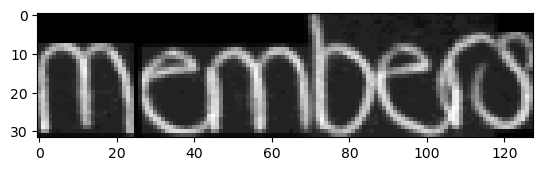

In [117]:
# predict outputs on validation images
i=502
j=506
prediction = act_model.predict(valid_images[i:j])
 
# use CTC decoder
decoded = K.ctc_decode(prediction,   
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]

out = K.get_value(decoded)

# see the results
for _, x in enumerate(out):
    
    print("original_text =  ", valid_original_text[i])
    print("predicted text = ", end = '')
    for p in x:
        if int(p) != -1:
            print(char_list[int(p)], end = '')
    plt.imshow(valid_images[i].reshape(32,128), cmap=plt.cm.gray)
    plt.show()
    i+=1
    print('\n')